In [39]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [40]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [41]:
import pandas as pd

variables = pd.DataFrame(breast_cancer_wisconsin_diagnostic.variables)
headerlist = variables['name'].to_list()
print(headerlist)

['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [43]:
import pandas as pd
data = pd.read_csv('Downloads/breast_cancer_data.csv')

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
# Convert 'Diagnosis' to a numerical format where Malignant (M) = 1 and Benign (B) = 0
data['Diagnosis_numeric'] = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Selecting the specified features for correlation analysis
features_to_analyze = ['texture1', 'area1', 'area3', 'smoothness1', 'smoothness3', 'Diagnosis_numeric']

# Compute the correlation matrix for the specified features and the diagnosis
correlation_matrix = data[features_to_analyze].corr()

# Display the correlation values between features and the diagnosis
correlation_matrix['Diagnosis_numeric']


texture1             0.415185
area1                0.708984
area3                0.733825
smoothness1          0.358560
smoothness3          0.421465
Diagnosis_numeric    1.000000
Name: Diagnosis_numeric, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

y = y.replace('M', 1)
y = y.replace('B', 0)
print(y)

data = pd.read_csv('Downloads/breast_cancer_data.csv')
features = data[['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']]
target = data['Diagnosis']

# Scaling the features
scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets for initial model fitting
X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initializing models
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
log_reg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
models = {
    "Logistic Regression L1": log_reg_l1,
    "Logistic Regression L2": log_reg_l2,
    "SVM": svm_model,
    "Random Forest": rf_model
}

# Cross-validation scores
cv_scores = {}

for model_name, model in models.items():
    # Compute 10-fold cross-validation scores
    scores = cross_val_score(model, features_scaled, target, cv=10)
    cv_scores[model_name] = scores.mean()

# Print the mean cross-validation scores for each model
for model_name, mean_score in cv_scores.items():
    print(f"{model_name}: {mean_score:.2%}")


     Diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]
Logistic Regression L1: 91.73%
Logistic Regression L2: 91.90%
SVM: 92.97%
Random Forest: 92.09%


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

data = pd.read_csv('Downloads/breast_cancer_data.csv')
features = data[['radius1', 'perimeter1', 'texture1', 'area1', 'smoothness1']]
target = data['Diagnosis']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets for initial model fitting
X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initializing models
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
log_reg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
models = {
    "Logistic Regression L1": log_reg_l1,
    "Logistic Regression L2": log_reg_l2,
    "SVM": svm_model,
    "Random Forest": rf_model
}

# Cross-validation scores
cv_scores = {}

for model_name, model in models.items():
    # Compute 10-fold cross-validation scores
    scores = cross_val_score(model, features_scaled, target, cv=10)
    cv_scores[model_name] = scores.mean()

# Print the mean cross-validation scores for each model
for model_name, mean_score in cv_scores.items():
    print(f"{model_name}: {mean_score:.2%}")


Logistic Regression L1: 92.78%
Logistic Regression L2: 92.61%
SVM: 92.62%
Random Forest: 91.74%


In [51]:
from sklearn.utils import resample
import numpy as np

# Function to perform bootstrapping and estimate model accuracy
def bootstrap_accuracy(model, X, y, n_iterations=1000, test_size=0.2):
    np.random.seed(42)  # For reproducibility
    accuracy_scores = []
    
    # Total number of samples in the dataset
    n_samples = X.shape[0]
    n_test_samples = int(n_samples * test_size)
    
    for _ in range(n_iterations):
        # Randomly sample with replacement from the original dataset
        X_resampled, y_resampled = resample(X, y)
        
        # Split the resampled data into training and testing sets
        X_train_resampled = X_resampled[:-n_test_samples]
        y_train_resampled = y_resampled[:-n_test_samples]
        X_test_resampled = X_resampled[-n_test_samples:]
        y_test_resampled = y_resampled[-n_test_samples:]
        
        # Fit the model and evaluate on the test set
        model.fit(X_train_resampled, y_train_resampled)
        predictions = model.predict(X_test_resampled)
        accuracy = accuracy_score(y_test_resampled, predictions)
        
        accuracy_scores.append(accuracy)
    
    return accuracy_scores

# Using SVM model for bootstrapping
svm_accuracy_scores = bootstrap_accuracy(svm_model, features_scaled, target)

# Calculate the mean accuracy and the 95% confidence interval of the accuracy scores
mean_accuracy = np.mean(svm_accuracy_scores)
confidence_interval = np.percentile(svm_accuracy_scores, [2.5, 97.5])

mean_accuracy, confidence_interval


(0.934858407079646, array([0.88495575, 0.97345133]))

In [52]:
from sklearn.utils import resample
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize the L1-regularized Logistic Regression model
l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)

# Using the L1-regularized Logistic Regression model for bootstrapping
l1_accuracy_scores = bootstrap_accuracy(l1_model, features_scaled, target)

# Calculate the mean accuracy score from the bootstrapped samples
l1_mean_accuracy_score = np.mean(l1_accuracy_scores)

l1_mean_accuracy_score


0.9313982300884955

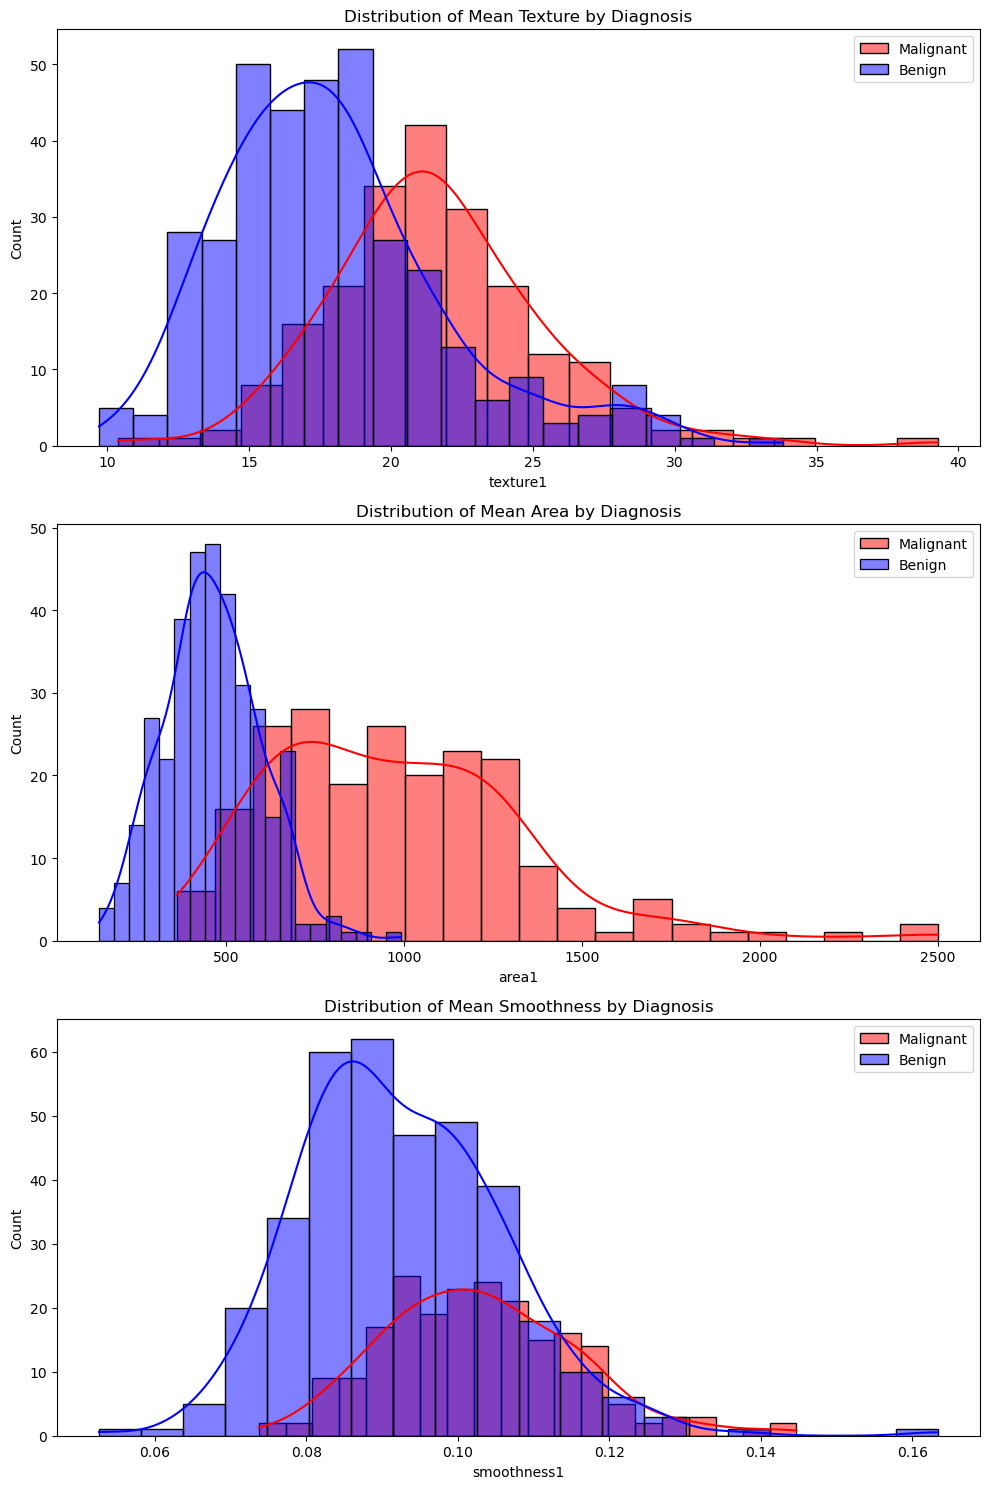

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Distribution by Diagnosis
malignant = data[data['Diagnosis'] == 'M'][['texture1', 'area1', 'smoothness1']]
benign = data[data['Diagnosis'] == 'B'][['texture1', 'area1', 'smoothness1']]

f, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

# Generating the plots
sns.histplot(malignant['texture1'], bins=20, color="red", label='Malignant', kde=True, ax=axes[0])
sns.histplot(benign['texture1'], bins=20, color="blue", label='Benign', kde=True, ax=axes[0])
axes[0].legend()
axes[0].set_title('Distribution of Mean Texture by Diagnosis')

sns.histplot(malignant['area1'], bins=20, color="red", label='Malignant', kde=True, ax=axes[1])
sns.histplot(benign['area1'], bins=20, color="blue", label='Benign', kde=True, ax=axes[1])
axes[1].legend()
axes[1].set_title('Distribution of Mean Area by Diagnosis')

sns.histplot(malignant['smoothness1'], bins=20, color="red", label='Malignant', kde=True, ax=axes[2])
sns.histplot(benign['smoothness1'], bins=20, color="blue", label='Benign', kde=True, ax=axes[2])
axes[2].legend()
axes[2].set_title('Distribution of Mean Smoothness by Diagnosis')

plt.tight_layout()
plt.show()


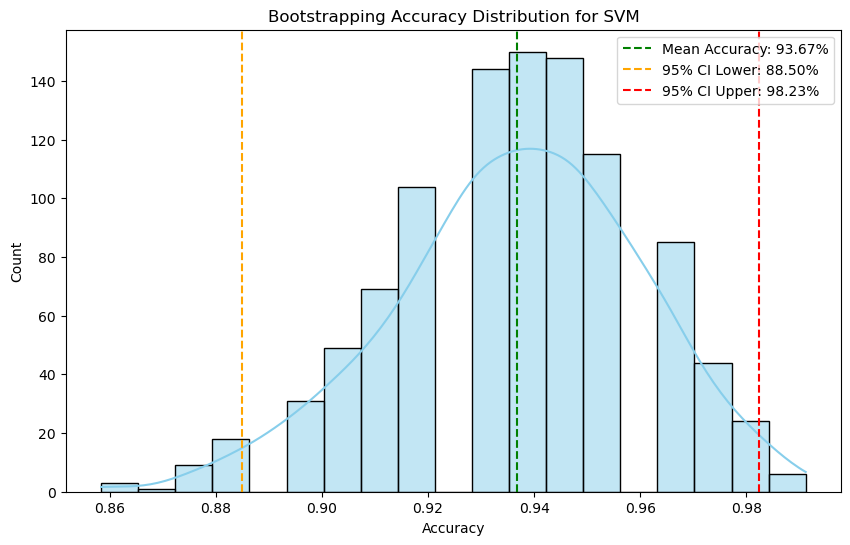

In [17]:
# Confidence Interval of Bootstrapping
plt.figure(figsize=(10, 6))
sns.histplot(svm_accuracy_scores, kde=True, color="skyblue")
plt.axvline(x=mean_accuracy, color='green', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2%}')
plt.axvline(x=confidence_interval[0], color='orange', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.2%}')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.2%}')
plt.title('Bootstrapping Accuracy Distribution for SVM')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

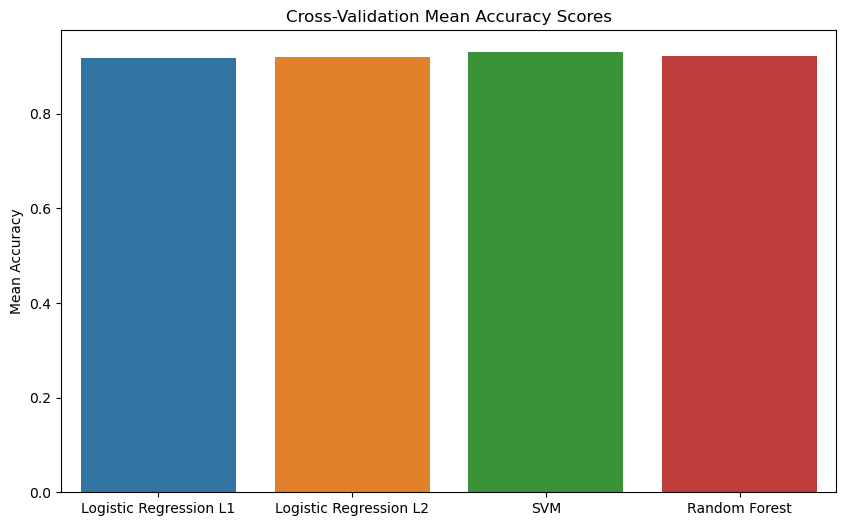

In [18]:
# Cross-Validation Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()))
plt.title('Cross-Validation Mean Accuracy Scores')
plt.ylabel('Mean Accuracy')
plt.show()